In [101]:
# First, we write the function for creating box
# This is the code to make a box around a vector v = [v1 v2 ... vn]^T with parameters r = [r1 r2 ... rn]^T
def make_box(v, r):
    n = len(v)
    zeros = [0]*(n+1)
    mat = []
    # Adding the constraints for positive values
    for r1 in r:
        zeros[0] = r1
        mat.append(zeros*1)
    # Adding the constraints for negative values
    for r1 in r:
        zeros[0] = r1
        mat.append(zeros*1)   
    # print('mat zeros = ', mat) # [[0.1,0,0], [0.1,0,0], [0.1,0,0], [0.1,0,0]]
    
    for i in range(n):
        mat[i][i+1] = 1 # [[0.1,1,0], [0.1,0,1], [0.1,0,0], [0.1,0,0]]
    # print('mat pos = ', mat)
    j = 1
    for i in range(n,2*n):
        mat[i][j] = -1 # # [[0.1,1,0], [0.1,0,1], [0.1,-1,0], [0.1,0,-1]]
        j += 1
    # print('mat for constraints = ', mat)
    Box = Polyhedron(ieqs=mat, backend='ppl', base_ring=QQ)
    return Box



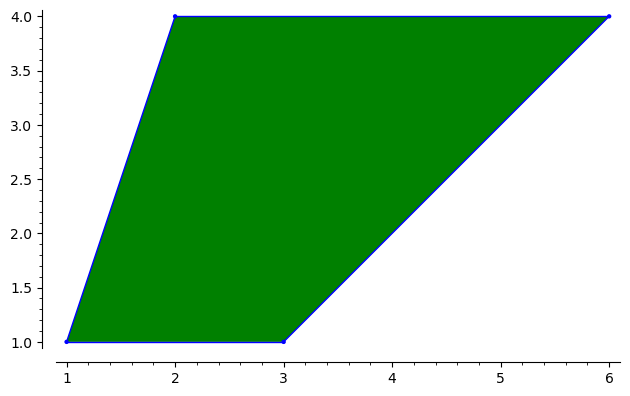

In [102]:
# Experiment 1
# We will describe a simple 2D example. First we define the initial state and the initial input
# X = [x y] is a state in 2D
# U = [u] is an input in 1D
# Since we have X in 2D and U in 1D, A will be a 2x2 matrix, B will be a 2x1 matrix, and K will be a 1x2 matrix

A = Matrix([[1,2],[3,4]])
B = Matrix([[0],[1]])
K = Matrix([-3,-5])
n, ep = 2, 0.2
u = 1
X0 = Polyhedron(ieqs=[(-1,0,1),(4,0,-1),(-2,3,-1),(2,-1,1)], backend='ppl', base_ring=QQ)
U0 = Polyhedron(eqns=[(-3,1)], backend='ppl', base_ring=QQ)
X0.plot()

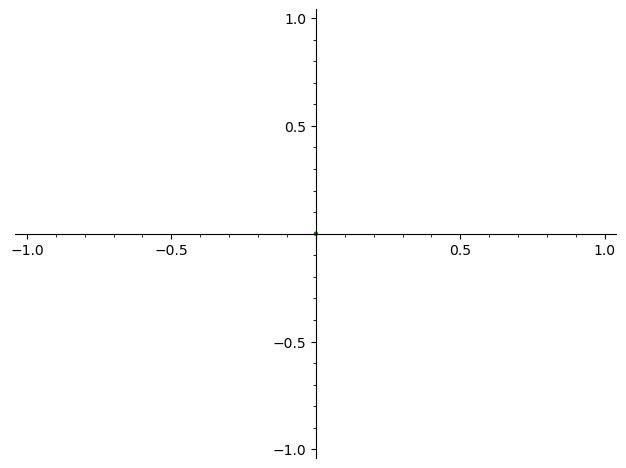

In [103]:
# Experiment 2
# We are doing anytime computation of a balance system. A balance system is a mechanical system in which
# the center of mass is balanced above a pivot point. 
# We first describe the state and the input
# X = [p p' theta theta'] where p = position, p' = velocity, theta = angle w.r.t base and object, theta' = angular rate
# U = F, the force applied on the object to keep the balance
X0 = Polyhedron(vertices = [(4,2,30,0.2)], backend='ppl', base_ring=QQ)
U0 = Polyhedron(eqns=[[3,1]], backend='ppl', base_ring=QQ)

M = 15 # Mass of the base (kg)
m = 20 # Mass of the object (kg)
J = 4 # Moment of inertia of the object (kgm^2)
l = 0.8 # Distance from the base to the center of mass of the object
c,y = 0.7, 0.2 # co-efficient of viscous friction
g = 9.8 # acceleration due to gravity
Mt = M+m
Jt = J + m*(l**2)
miu = ((Mt*Jt) - ((m**2)*(l**2)))
a1 = ((m**2)*(l**2)*g)/(miu)
a2 = -((c*Jt)/miu)
a3 = -((y*Jt*l*m)/miu)
a4 = (Mt*m*g*l)/miu
a5 = -((c*l*m)/miu)
a6 = -((y*Mt)/miu)
u1 = (Jt/miu)
u2 = (l*m)/miu

A = Matrix([[0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, a1, a2, a3],
            [0, a4, a5, a6]])*0.0001

B = Matrix([[0],
            [0],
            [u1],
            [u2]])*0.0001

K = Matrix([1, 0, 1, 0])
n, ep = 4, 0.2
u = 1

X0.plot()

In [104]:
# Experiment 3
X0 = Polyhedron(vertices = [(0,30,45,0.2,0.2,0.3)], backend='ppl', base_ring=QQ)
U0 = Polyhedron(vertices=[(3,4,2,3),(2,2,1,1)], backend='ppl', base_ring=QQ)
# We describe some parameters to compute the matrices A and B
# distance from center to each motor
d = 0.2
# constant c
c = 5
# Torques along x,y and z axis
lx, ly, lz = 3, 3, 3

A = Matrix([[0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0]])*0.001

B = Matrix([[0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,d/lx,0,-d/lx],
            [d/ly,0,-d/ly,0],
            [-c/lz,c/lz,-c/lz,c/lz]])*0.001

K = Matrix([[ 4.46409843e-16,  7.07106781e-01, -5.00000000e-01,  2.43835809e-15,   3.33265686e+00, -6.32455532e-01],
 [ 7.07106781e-01, -1.43004290e-16,  5.00000000e-01,  3.33265686e+00,   1.26459062e-15,  6.32455532e-01],
 [-6.07349885e-16, -7.07106781e-01, -5.00000000e-01,  1.00266266e-16,  -3.33265686e+00, -6.32455532e-01],
 [-7.07106781e-01,  5.53252972e-17,  5.00000000e-01, -3.33265686e+00,  -1.07350120e-15,  6.32455532e-01]])
n, ep = 6, 0.2
u = 4


In [105]:
# Create the box
v = [0]*n
r = [ep]*n
Box = make_box(v,r)

In [106]:
def minkowski_pol(P1, P2):
    V1 = P1.vertices_list()
    V2 = P2.vertices_list()
    V3 = []
    for v1 in V1:
        for v2 in V2:
            v = [a+b for a,b in zip(v1,v2)]
            V3.append(v)
    print(V3)
    P_out = Polyhedron(vertices = V3, backend='ppl', base_ring=QQ)
    return P_out
X1 = Polyhedron(vertices=[(5,1), (1,1), (0,0)],backend='ppl', base_ring=QQ)
X2 = Polyhedron(vertices=[(2,1), (2,2)],backend='ppl', base_ring=QQ)

X3 = minkowski_pol(X1,X2)
X3.vertices_list()


[[2, 1], [2, 2], [3, 2], [3, 3], [7, 2], [7, 3]]


[[2, 1], [2, 2], [7, 3], [3, 3], [7, 2]]

In [107]:
Xc = X0
Uc = U0
iter = 50
for i in range(iter):
    try:
        print('iteration = ', i+1)
        AXc = A*Xc
        print("AXc = ", AXc)
        BUc = B*Uc
        print("BUc = ", BUc)
        Xc = (AXc+BUc)
        print('Number_of_Cons(Xc) = ', len(list(Xc.Hrepresentation())))
        # print('Box = ', Box)
        Xp = Xc + Box
        print('Number_of_Cons(Xp) = ', len(list(Xp.Hrepresentation())))
        Uc = K*Xp
        print('Number_of_Cons(Uc) = ', len(list(Uc.Hrepresentation())))
        # Xw = Xc & W
        # if (Xw.vertices_list()):
        #     print(Xw)
        #     print("Unsafe state reached!!!\n", file=f)
        #     break

        print('Vol(Xc) = ', float(Xc.volume()))
        # print('Vol(Xp) = ', float(Xp.volume()))
        # print('Vol(Uc) = ', float(Uc.volume()))

    except ValueError as ve:
        print('ValueError = ', ve)
        break
    except ZeroDivisionError as ze:
        print("ZeroDivisionError = ", ze)

Xc.plot()

iteration =  1
AXc =  A 0-dimensional polyhedron in RDF^6 defined as the convex hull of 1 vertex
BUc =  A 1-dimensional polyhedron in RDF^6 defined as the convex hull of 2 vertices
Number_of_Cons(Xc) =  7
[[0.20020000000000002, -0.1998, -0.19970000000000002, 0.20006666666667, -0.19993333333333002, 0.2], [0.20020000000000002, 0.20020000000000002, -0.19970000000000002, -0.19993333333333002, -0.19993333333333002, -0.2], [0.20020000000000002, 0.20020000000000002, 0.2003, -0.19993333333333002, 0.20006666666667, 0.2], [0.20020000000000002, 0.20020000000000002, 0.2003, 0.20006666666667, -0.19993333333333002, -0.2], [0.20020000000000002, 0.20020000000000002, 0.2003, 0.20006666666667, 0.20006666666667, -0.2], [0.20020000000000002, 0.20020000000000002, 0.2003, 0.20006666666667, 0.20006666666667, 0.2], [0.20020000000000002, 0.20020000000000002, 0.2003, 0.20006666666667, -0.19993333333333002, 0.2], [0.20020000000000002, 0.20020000000000002, 0.2003, -0.19993333333333002, -0.19993333333333002, 0.2],

/private/var/tmp/sage-10.1-current/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/sage/geometry/polyhedron/backend_cdd_rdf.py:188: UserWarning: This polyhedron data is numerically complicated; cdd could not convert between the inexact V and H representation without loss of data. The resulting object might show inconsistencies.
  warn("This polyhedron data is numerically complicated; cdd could not convert between the inexact V and H representation without loss of data. The resulting object might show inconsistencies.")


AXc =  A 0-dimensional polyhedron in RDF^6 defined as the convex hull of 8 vertices
BUc =  A 3-dimensional polyhedron in RDF^6 defined as the convex hull of 8 vertices
Number_of_Cons(Xc) =  9
[[0.2, -0.2, -0.2, 0.19989222507940002, -0.19989222507930002, 0.198483665866], [0.2, 0.2, -0.2, -0.2001077749206, -0.19989222507930002, -0.20151633413400002], [0.2, 0.2, 0.2, -0.2001077749206, 0.2001077749207, 0.198483665866], [0.2, 0.2, 0.2, 0.19989222507940002, -0.19989222507930002, -0.20151633413400002], [0.2, 0.2, 0.2, 0.19989222507940002, 0.2001077749207, -0.20151633413400002], [0.2, 0.2, 0.2, 0.19989222507940002, 0.2001077749207, 0.198483665866], [0.2, 0.2, 0.2, 0.19989222507940002, -0.19989222507930002, 0.198483665866], [0.2, 0.2, 0.2, -0.2001077749206, -0.19989222507930002, 0.198483665866], [0.2, 0.2, 0.2, -0.2001077749206, -0.19989222507930002, -0.20151633413400002], [0.2, 0.2, 0.2, -0.2001077749206, 0.2001077749207, -0.20151633413400002], [0.2, 0.2, -0.2, -0.2001077749206, 0.200107774920

Graphics3d Object